# Welcome to our demonstration. 
## Produced by Jedidiah Woodley, Will Alston and supervised by Francesco Turci

### This notebook will run through a simulation of a chemical reaction network. Introducing a modular approach to solving any network given certain parameters. The aim of this work is to show that the modular approach produces equivalent results, to solving the entire network out right which will be proved by calculating the fundamental resistance matrix of the network in both methods.

In [64]:
# all imports
from my_objects import *
from my_objects import ModuleProperties, CombiningModules

# Welcome to our demonstration

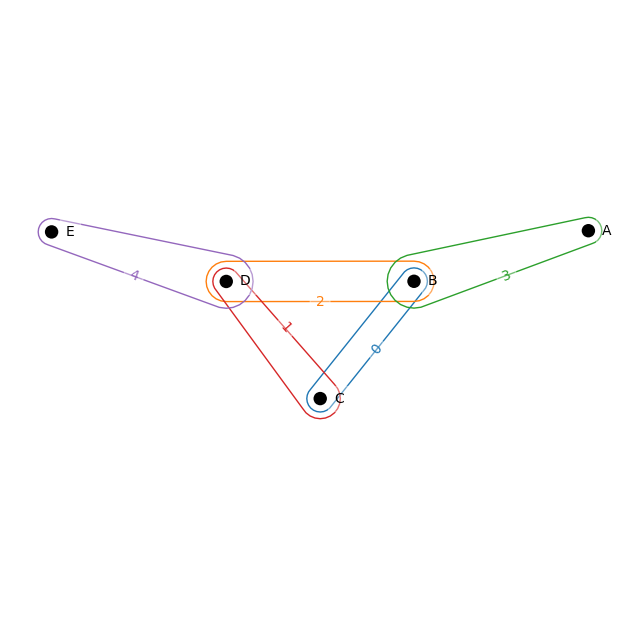

In [65]:
SMalpha = Matrix( [[-1,0,-1,-1,0],
                   [1,-1,0,0,0],
                   [0,1,1,0,-1],
                   [0,0,0,1,0],
                   [0,0,0,0,1]] )
num_internal_species_alpha = 3
labels_alpha = {0: 'B', 1: 'C', 2: 'D', 3: 'A', 4: 'E'}
species_names_alpha = ["B", "C", "D", "A", "E"]
modalpha = ModuleProperties(SMalpha, num_internal_species_alpha, labels_alpha, species_names_alpha)
modalpha.draw_full_hypergraph()


#### This is a hypergraph. It represents a chemical reaction network with five chemical species labelled as nodes from A to E. It also describes a set of reversible reactions as bubbles around these nodes labelled from 0 to 4

#### Another representation of the reaction network is a stoichiometric matrix, in this case:


\begin{pmatrix}
-1 & 0 & -1 & -1 & 0 \\
1 & -1 & 0 & 0 & 0 \\
0 & 1 & 1 & 0 & -1 \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 1
\end{pmatrix}


#### Where row $i$ shows how species $i$ participates across all reactions 
#### and column $j$ encodes how reaction $j$ changes each species 
#### So if the stoichiometric matrix is represented by $\nabla$
$$\nabla_{ij} =
\begin{cases}
-1 \text{ if species } i \text{ is consumed in reaction } j,\\[6pt]
+1  \text{ if species } i \text{ is produced in reaction } j,\\[6pt]
0  \text{ otherwise}.
\end{cases}$$

#### The stoichiometric matrix is particularly useful as it provides a numeric way to represent the network which, can then be used by our programme to solve the network!

#### N.B In our networks all reactions are reversible and so the -1/+1 above describes the forward reaction and so positive current suggests forward reaction occurs more than backward reaction and netflow of species is towards creating the species with +1

#### The type of networks we are interested in solving are those at steady state in a non equilibrium system. This system occurs naturally in the environment when there are certain species chemostated/external (connected to resevoirs large enough that their concentration never changes). These external species are what drive non-zero flows of chemical species around then network at its steady state.

#### To use our programme the user must provide information about which species are internal or external (variable or kept constant) and formulate the stoichiometeric matrix they provide with the internal species listed in rows $i$ first then followed by external rows after 

In [66]:
# test_module = ModuleProperties(STOICH_MATRIX, NUM_INTERNAL_SPECIES, LABELS, SPECIES_NAMES)

#### To create an object related to a specific module's reaction network use our class ModuleProperties

#### To use the class you will need to pass it:
* A stoichiometric matrix (2D Array)
* The number of internal species in the module (An integer)
* A mapping between names of species and indexes (A dictionary)
* A list of species names (A list)


#### Once you have created your object you can use any of the methods available to calculate certain quantities in the steady state.

In [67]:
modalpha.calculate_fundamental_resistance_matrix()

Below is a dictionary of all the methods available and what they do

In [68]:
import inspect

for name, func in inspect.getmembers(ModuleProperties, predicate=inspect.isfunction):
    print(f"{name}:")
    print(inspect.getdoc(func) or "No docstring provided.")
    print("\n")   # extra blank line between methods


__init__:
Initialize self.  See help(type(self)) for accurate signature.


calculate_conservation_laws:
This method calculates the conservation law matrices for the full stoichiometric matrix and the chemostat species only.

Returns:
    cons_laws.T (Sympy Matrix): Conservation law matrix for the full stoichiometric matrix  
    chemostat_laws.T (Sympy Matrix): Conservation law matrix for the chemostat species only


calculate_coupling_matrix:
This method calculates the coupling matrix between internal and external species using reaction cycle matrix 
and SM of external species.

Returns:
    phi (Sympy Matrix): Coupling matrix between internal and external species


calculate_cycle_resistance_matrix:
Uses the reaction level resistance matrix and reaction cycles matrix to calculate the cycle resistance matrix for the module.

Returns:
    cycle_resistance_matrix (Sympy Matrix): Cycle resistance matrix for the module


calculate_fundamental_conductance_matrix:
This method calculates the

#### Now in this example we will introduce a second module which we will create an object for 

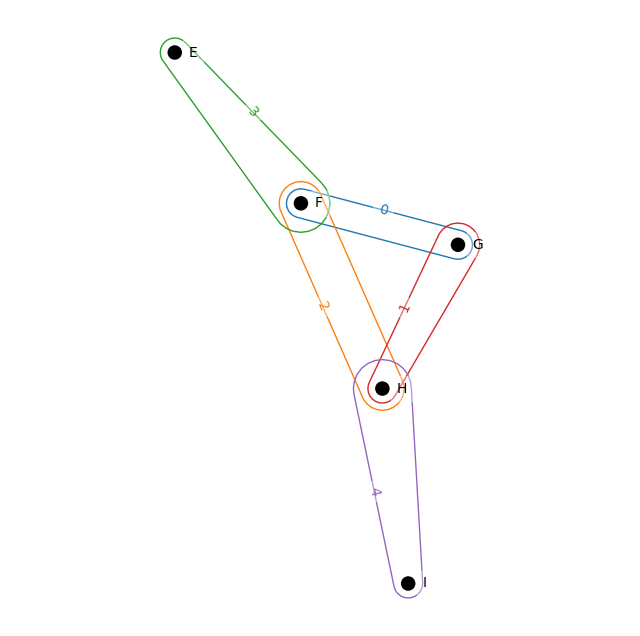

In [69]:
SMbeta = Matrix( [[-1,0,-1,-1,0],
                   [1,-1,0,0,0],
                   [0,1,1,0,-1],
                   [0,0,0,1,0],
                   [0,0,0,0,1]] )
num_internal_species_beta = 3
labels_beta = {0: 'F', 1: 'G', 2: 'H', 3: 'E', 4: 'I'}
species_names_beta = ["F", "G", "H", "E", "I"]
modbeta = ModuleProperties(SMbeta, num_internal_species_beta, labels_beta, species_names_beta)
modbeta.draw_full_hypergraph()

#### You will notice the graph has the same structure as the last with one key difference the labels for the species have been modified

#### The idea behind this is to combine two modules together the programme needs to know which species connect one module to another. In this case external species 'E' appears in both hypergraphs.

#### 'E' acts as a bridge between the two modules; it is the pin which connects module alpha to module beta.

#### In order to connect two modules together you want to make use of the CombiningModules class.

In [70]:
mod_alpha_beta = CombiningModules(modalpha, modbeta)

#### The class requires two inputs. Both must be objects created from either ModuleProperties or CombiningModules.

#### As a result of this flexibility it is possible to reuse CombiningModules with a module you just combined.

#### The code has two main methods
* Primarily, it is possible to follow an algorithmic approach with many intermediate methods, in order to calculate the fundamental resistance matrix of the resulting combined network. The method takes advantage of the fact the modules are connected in series and uses the resulting properties to simplify the calculation. We would like to test this modular method for efficiency against solving the entire network using ModuleProperties
* The other key method uses ModuleProperties on the resulting combined network. Use this to calculate quantities explained above or draw resulting hypergraphs of larger networks.

In [71]:
mod_alpha_beta.calculate_fundamental_resistance_matrix()

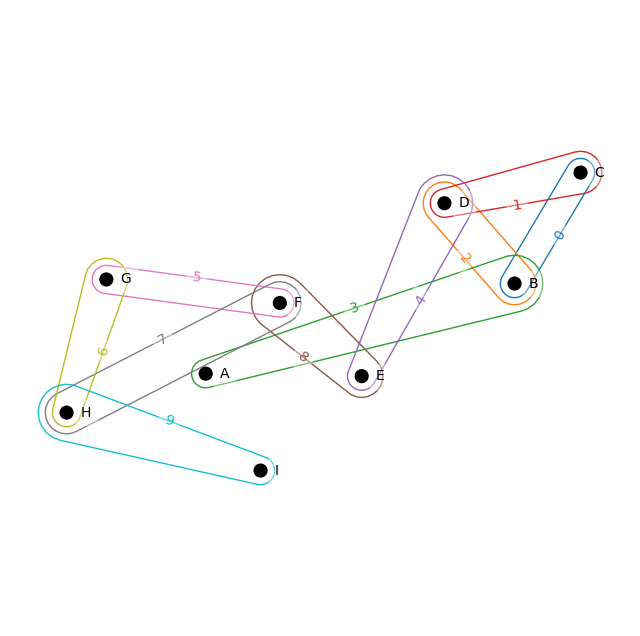

In [72]:
mod_alpha_beta_properties = mod_alpha_beta.module_properties()
mod_alpha_beta_properties.draw_full_hypergraph()

#### As mentioned, mod_alpha_beta_properties could now be used to calculate the same fundamental resistance matrix but by solving the entire network at once

In [73]:
mod_alpha_beta_properties.calculate_fundamental_resistance_matrix()

#### And as hoped we get the same result, but was it faster or slower?

In [74]:
import time

In [75]:
%timeit mod_alpha_beta.calculate_fundamental_resistance_matrix()

42.2 ms ± 1.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [76]:
%timeit mod_alpha_beta_properties.calculate_fundamental_resistance_matrix()

24.3 ms ± 2.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


The algorithm came up slower!

This may be an expected result, since the combined network is still quite small.

Let's try adding a third module and see if it makes a difference

In [77]:
SMgamma = Matrix( [[-1,0,-1,-1,0],
                   [1,-1,0,0,0],
                     [0,1,1,0,-1],
                     [0,0,0,1,0],
                     [0,0,0,0,1]] )
num_internal_species_gamma = 3
labels_gamma = {0: 'J', 1: 'K', 2: 'L', 3: 'I', 4: 'M'}
species_names_gamma = ["J", "K", "L", "I", "M"]
modgamma = ModuleProperties(SMgamma, num_internal_species_gamma, labels_gamma, species_names_gamma)

In [78]:
mod_alpha_beta_gamma = CombiningModules(mod_alpha_beta_properties, modgamma)
%timeit mod_alpha_beta_gamma.calculate_fundamental_resistance_matrix()

55.4 ms ± 4.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [79]:
mod_alpha_beta_gamma_properties = mod_alpha_beta_gamma.module_properties()
%timeit mod_alpha_beta_gamma_properties.calculate_fundamental_resistance_matrix()

175 ms ± 14.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### It seems like with a total of only three modules combined, the programme is now faster when tackling the problem with a modular approach, rather than a solving the entire network at once. Showing the modular approach does have some promise to it.


# This concludes our demonstration and we invite you to test the programme further and solve your own chemical rection networks! 